In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline


## running the model

In [3]:
from Regard import init
args = init(verbose=1, epochs = 30)
print('Parameters=', args)

path = '_Regard.pt'

Parameters= {'batch_size': 16, 'test_batch_size': 1, 'valid_size': 0.2, 'epochs': 30, 'lr': 0.005, 'momentum': 0.48, 'no_cuda': True, 'num_processes': 1, 'seed': 42, 'log_interval': 10, 'dimension': 25, 'verbose': 1, 'conv1_dim': 4, 'conv1_kernel_size': 7, 'conv2_dim': 13, 'conv2_kernel_size': 5, 'stride1': 2, 'stride2': 2, 'crop': 200, 'size': 128, 'mean': 0.36, 'std': 0.3}


In [4]:
from Regard import ML
ml = ML(args)

import os
import torch
ml.model.load_state_dict(torch.load(path))
print('Loading file', path)



cuda? False
cuda? False
Found 799 sample images;  640  to train 159 to test
Loading file _Regard.pt


In [5]:
ml.dataset.dataset.classes

['blink', 'center', 'left', 'right']

    content_image = utils.load_image(args.content_image, scale=args.content_scale)

## testing the model

In [6]:
import imageio
image = imageio.imread('./dataset/right/2018-03-20_Nicolas_40.png')
image = (image-image.min())/(image.max()-image.min()) * 1.
image *= args.std
image += args.mean
print('size of input image', image.shape)

size of input image (243, 243, 3)


In [7]:
from PIL import Image
image = Image.open('./dataset/right/2018-03-20_Nicolas_40.png')
print('size of input image', image.height, image.width)

size of input image 243 243


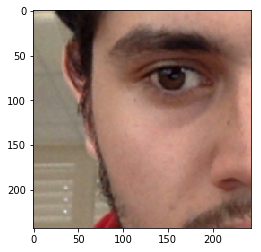

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

#show the image
plt.imshow(image)
plt.show() 

In [9]:
from torchvision import transforms

#t = transforms.Normalize(mean=args.mean, std=args.std)
t = transforms.Compose([
    transforms.CenterCrop(args.crop),
    transforms.Resize(args.size),
    transforms.ToTensor(),
    #transforms.Normalize(mean=self.IMAGENET_MEAN, std=self.IMAGENET_STD),
    transforms.Normalize(mean=[args.mean]*3, std=[args.std]*3),
    ])


data = t(image)
data.unsqueeze_(0)

print('size of data image', data.shape)


size of data image torch.Size([1, 3, 128, 128])


In [10]:
output = ml.model(data)#.double())

In [11]:
output


tensor([[-59.7109, -17.0854, -57.7734,   0.0000]], grad_fn=<LogSoftmaxBackward>)

In [12]:
def classify(image, t):
    data = t(image)
    data.unsqueeze_(0)
    output = ml.model(data)#.double())
    #output = ml.model.forward(image)

    pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
    return pred

import time
t0 = time.time()
pred = classify(image, t)
print('Elapsed time =', (time.time()-t0)*1000, 'ms')
print('Prediction =', ml.dataset.dataset.classes[pred])

Elapsed time = 9.45591926574707 ms
Prediction = right


In [13]:
import numpy as np
data = torch.from_numpy(np.transpose(image, (2, 0, 1)))
#data = torch.from_numpy(image)
print('size of data image', data.shape)


size of data image torch.Size([3, 243, 243])


In [14]:
data = torch.randn((3, 243, 243))
print('size of data image', data.shape)



size of data image torch.Size([3, 243, 243])


In [15]:
#t = transforms.Normalize(mean=args.mean, std=args.std)
t = transforms.Compose([
    transforms.CenterCrop(args.crop),
    transforms.Resize(args.size),
    transforms.ToTensor(),
    #transforms.Normalize(mean=self.IMAGENET_MEAN, std=self.IMAGENET_STD),
    transforms.Normalize(mean=[args.mean]*3, std=[args.std]*3),
    ])

#data = t(data)
#print('size of data image', data.shape)


# dynamical test

/Users/laurentperrinet/research/Shared/2018-03-19_StageL3/LeCheapEyeTracker/src/LeCheapEyeTracker/haarcascade_frontalface_default.xml
Time 282803.293940906
[[257 174 217 217]] 2
[[257 174 217 217]] 2
[[252 170 220 220]] 2
[[252 170 220 220]] 2


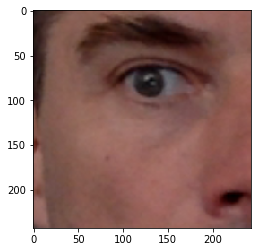

Prediction = right
Elapsed time = 637.248 ms
[[248 172 222 222]] 2
[[248 172 222 222]] 2


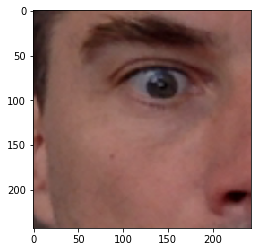

Prediction = center
Elapsed time = 393.703 ms
[[250 175 220 220]] 2
[[250 175 220 220]] 2


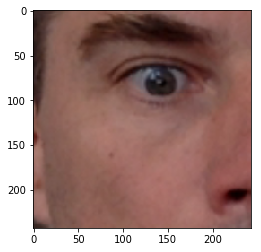

Prediction = center
Elapsed time = 388.828 ms
[[255 179 213 213]] 2
[[255 179 213 213]] 2


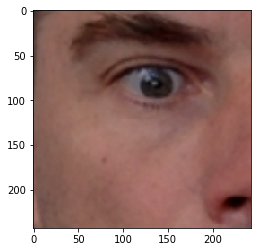

Prediction = center
Elapsed time = 369.838 ms
[[246 178 216 216]] 2
[[246 178 216 216]] 2


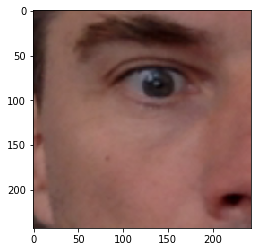

Prediction = center
Elapsed time = 363.685 ms
[[243 177 218 218]] 2
[[243 177 218 218]] 2


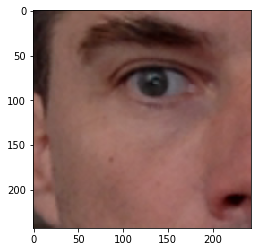

Prediction = right
Elapsed time = 361.630 ms
[[247 178 217 217]] 2
[[247 178 217 217]] 2


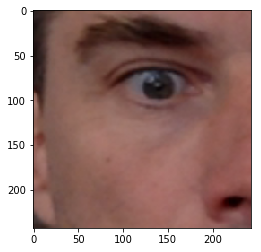

Prediction = center
Elapsed time = 360.324 ms
[[251 180 215 215]] 2
[[251 180 215 215]] 2


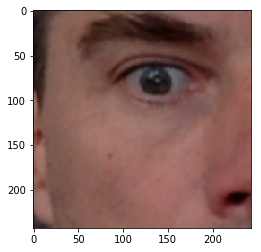

Prediction = right
Elapsed time = 848.890 ms
[[240 175 221 221]] 2
[[240 175 221 221]] 2


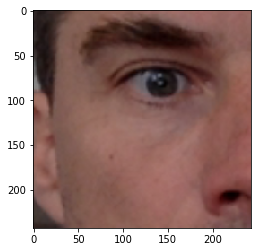

Prediction = center
Elapsed time = 466.505 ms
[[250 178 215 215]] 2
[[250 178 215 215]] 2


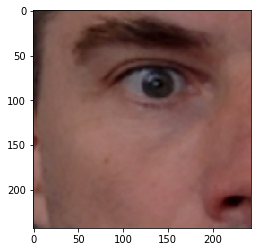

Prediction = center
Elapsed time = 350.505 ms
[[247 178 217 217]] 2
[[247 178 217 217]] 2


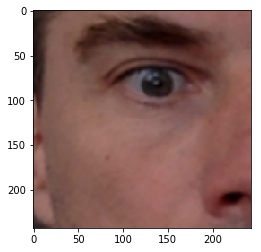

Prediction = center
Elapsed time = 404.205 ms
[[246 180 214 214]] 2
[[246 180 214 214]] 2


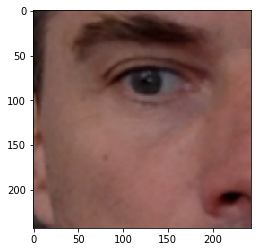

Prediction = right
Elapsed time = 336.153 ms
[[243 178 216 216]] 2
[[243 178 216 216]] 2


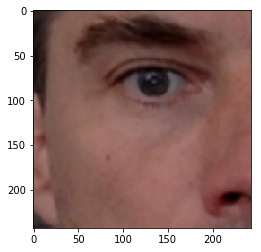

Prediction = right
Elapsed time = 324.517 ms
[[241 177 219 219]] 2
[[241 177 219 219]] 2


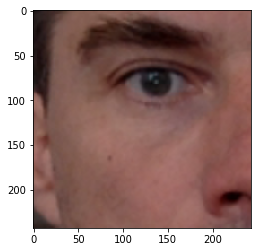

Prediction = right
Elapsed time = 330.489 ms
[[242 177 217 217]] 2
[[242 177 217 217]] 2


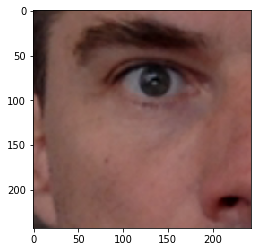

Prediction = right
Elapsed time = 331.671 ms
[[241 180 214 214]] 2
[[241 180 214 214]] 2


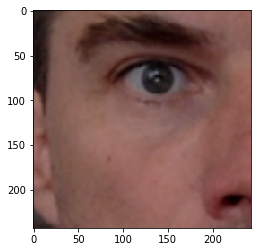

Prediction = center
Elapsed time = 375.621 ms
[[239 179 218 218]] 2
[[239 179 218 218]] 2


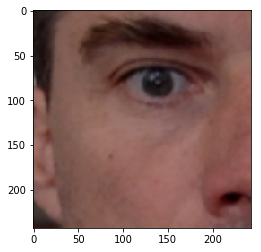

Prediction = right
Elapsed time = 334.375 ms
[[240 181 215 215]] 2
[[240 181 215 215]] 2


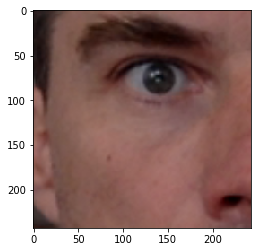

Prediction = center
Elapsed time = 363.755 ms
[[238 179 217 217]] 2
[[238 179 217 217]] 2


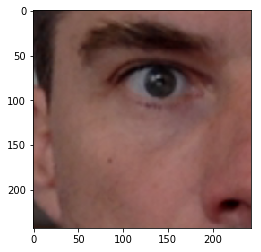

Prediction = center
Elapsed time = 350.769 ms
[[237 178 220 220]] 2
[[237 178 220 220]] 2


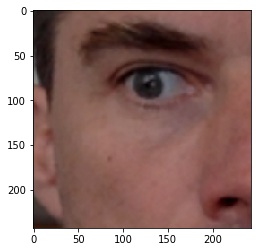

Prediction = right
Elapsed time = 349.641 ms
[[238 179 215 215]] 2
[[238 179 215 215]] 2


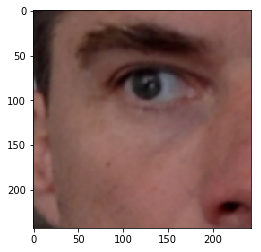

Prediction = right
Elapsed time = 327.385 ms
[[235 179 217 217]] 2
[[235 179 217 217]] 2


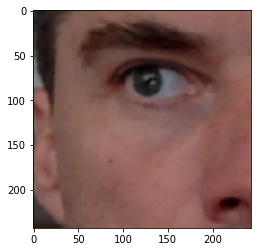

Prediction = right
Elapsed time = 353.588 ms
[[234 178 220 220]] 2
[[234 178 220 220]] 2


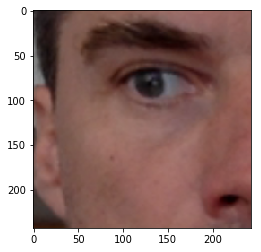

Prediction = right
Elapsed time = 351.825 ms
[[236 183 215 215]] 2
[[236 183 215 215]] 2


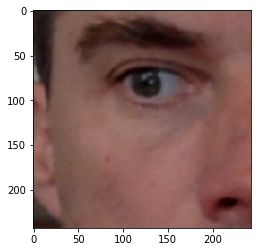

Prediction = right
Elapsed time = 381.825 ms
[[236 182 216 216]] 2
[[236 182 216 216]] 2


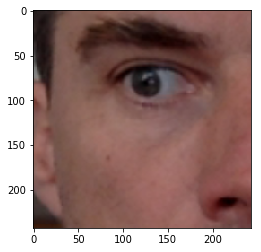

Prediction = right
Elapsed time = 347.966 ms
[[234 179 221 221]] 2
[[234 179 221 221]] 2


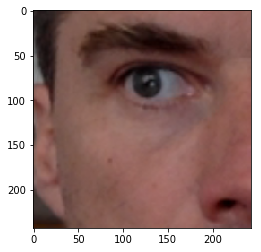

Prediction = right
Elapsed time = 335.472 ms
[[234 179 220 220]] 2
[[234 179 220 220]] 2


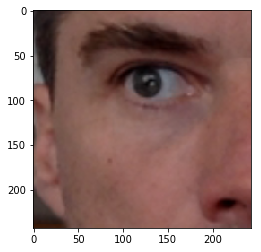

Prediction = right
Elapsed time = 390.923 ms
[[234 178 222 222]] 2
[[234 178 222 222]] 2


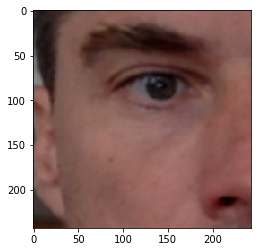

Prediction = left
Elapsed time = 339.781 ms
[[239 181 215 215]] 2
[[239 181 215 215]] 2


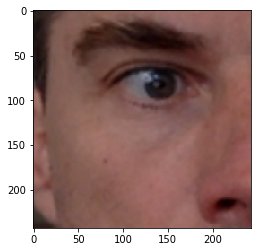

Prediction = left
Elapsed time = 328.007 ms
[[238 177 218 218]] 2
[[238 177 218 218]] 2


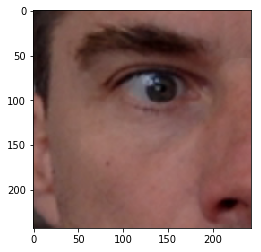

Prediction = left
Elapsed time = 362.568 ms
[[240 178 216 216]] 2
[[240 178 216 216]] 2


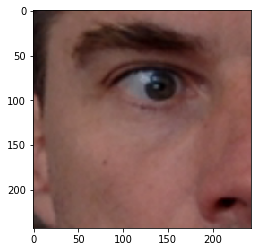

Prediction = left
Elapsed time = 346.105 ms
[[238 179 219 219]] 2
[[238 179 219 219]] 2


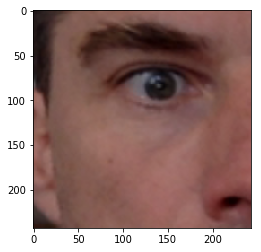

Prediction = center
Elapsed time = 355.902 ms
[[244 183 215 215]] 2
[[244 183 215 215]] 2


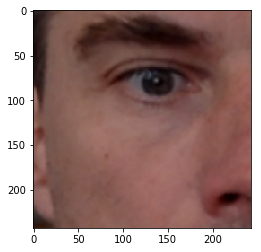

Prediction = center
Elapsed time = 345.202 ms
[[244 177 217 217]] 2
[[244 177 217 217]] 2


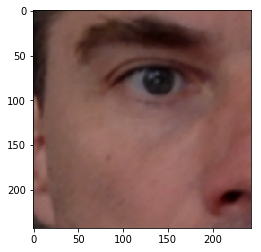

Prediction = center
Elapsed time = 562.845 ms
[[253 171 218 218]] 2
[[253 171 218 218]] 2


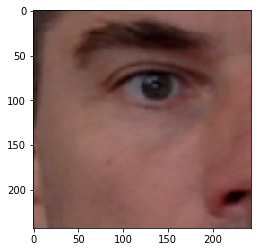

Prediction = right
Elapsed time = 414.247 ms
[[257 175 217 217]] 2
[[257 175 217 217]] 2


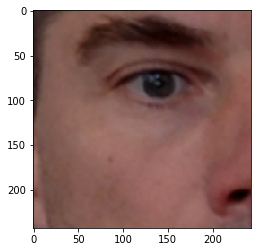

Prediction = center
Elapsed time = 503.740 ms
[[264 176 212 212]] 2
[[264 176 212 212]] 2


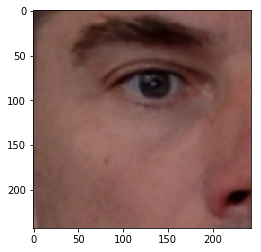

Prediction = right
Elapsed time = 825.015 ms
[[255 173 221 221]] 2
[[255 173 221 221]] 2


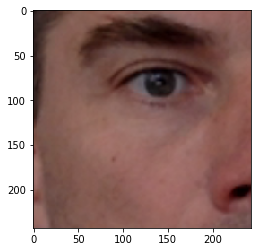

Prediction = center
Elapsed time = 774.126 ms
[[258 180 217 217]] 2
[[258 180 217 217]] 2


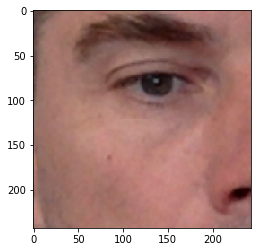

Prediction = right
Elapsed time = 843.996 ms
[[260 178 212 212]] 2
[[260 178 212 212]] 2


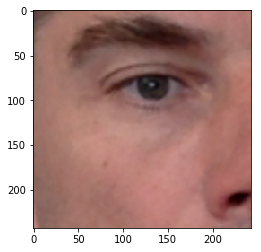

Prediction = right
Elapsed time = 481.851 ms
[[262 179 214 214]] 2
[[262 179 214 214]] 2


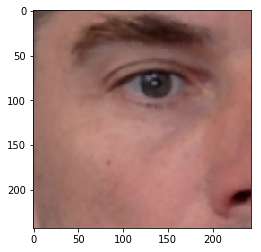

Prediction = right
Elapsed time = 728.546 ms
[[260 181 218 218]] 2
[[260 181 218 218]] 2


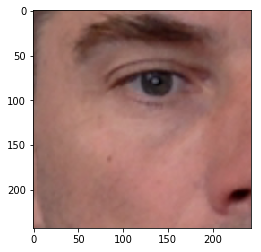

Prediction = right
Elapsed time = 697.410 ms
[[256 183 214 214]] 2
[[256 183 214 214]] 2


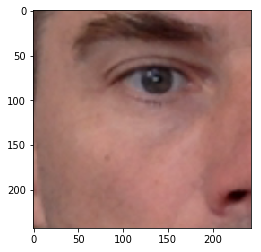

Prediction = right
Elapsed time = 469.048 ms
[[255 181 217 217]] 2
[[255 181 217 217]] 2


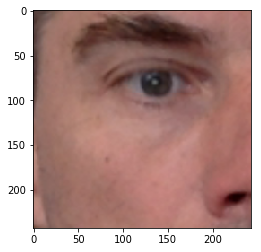

Prediction = right
Elapsed time = 902.712 ms
[[258 180 216 216]] 2
[[258 180 216 216]] 2


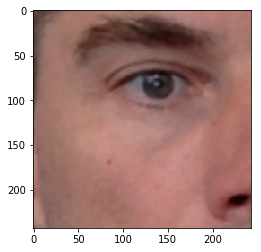

Prediction = right
Elapsed time = 342.199 ms
[[261 180 216 216]] 2
[[261 180 216 216]] 2


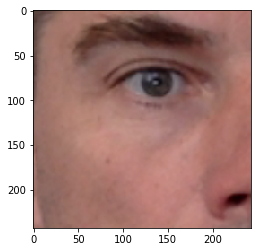

Prediction = right
Elapsed time = 359.099 ms
[[261 181 216 216]] 2
[[261 181 216 216]] 2


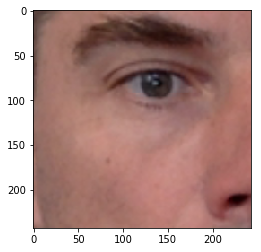

Prediction = right
Elapsed time = 1212.331 ms
[[262 183 217 217]] 2
[[262 183 217 217]] 2


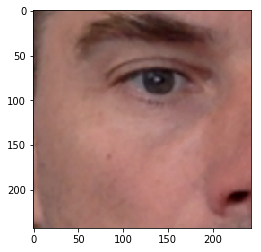

Prediction = right
Elapsed time = 778.662 ms
[[261 182 213 213]] 2
[[261 182 213 213]] 2


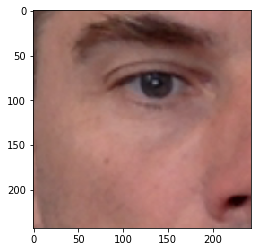

Prediction = right
Elapsed time = 542.488 ms
[[260 182 214 214]] 2
[[260 182 214 214]] 2


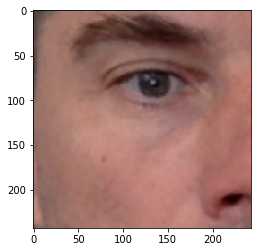

Prediction = right
Elapsed time = 385.727 ms
[[259 180 216 216]] 2
[[259 180 216 216]] 2


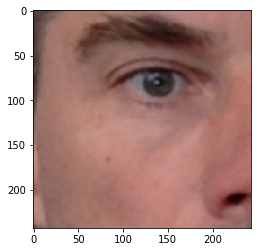

Prediction = right
Elapsed time = 352.409 ms
[[262 182 213 213]] 2
[[262 182 213 213]] 2


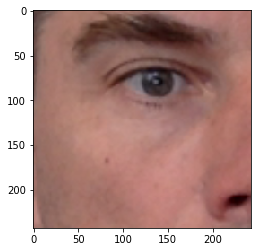

Prediction = right
Elapsed time = 549.127 ms
[[263 182 215 215]] 2
[[263 182 215 215]] 2


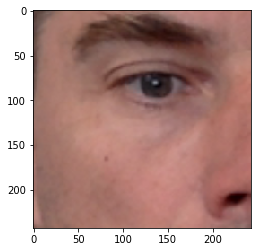

Prediction = right
Elapsed time = 392.308 ms
[[260 180 214 214]] 2
[[260 180 214 214]] 2


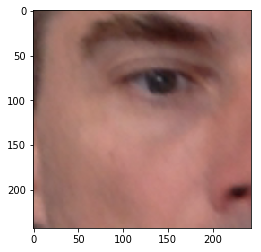

Prediction = center
Elapsed time = 339.770 ms
[[237 171 200 200]] 2
[[237 171 200 200]] 2


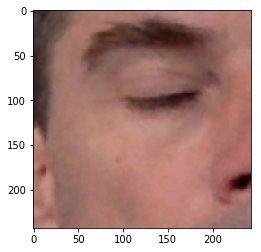

Prediction = blink
Elapsed time = 576.168 ms
[[254 173 189 189]] 2
[[254 173 189 189]] 2


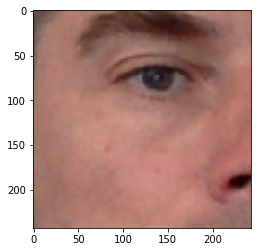

Prediction = right
Elapsed time = 497.278 ms
[[273 173 197 197]] 2
[[273 173 197 197]] 2


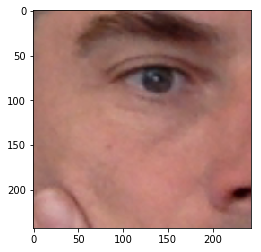

Prediction = right
Elapsed time = 708.771 ms
[[269 186 191 191]] 2
[[269 186 191 191]] 2


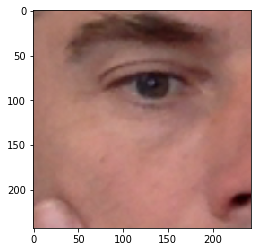

Prediction = right
Elapsed time = 766.146 ms
[[291 184 202 202]] 2
[[291 184 202 202]] 2


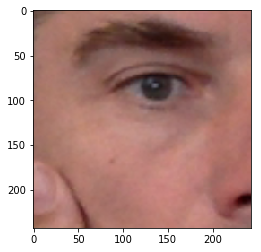

Prediction = right
Elapsed time = 569.090 ms
[[279 185 202 202]] 2
[[279 185 202 202]] 2


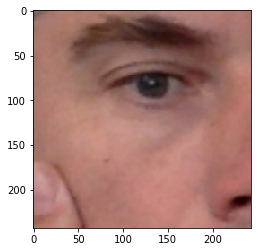

Prediction = right
Elapsed time = 757.488 ms
[[270 190 198 198]] 2
[[270 190 198 198]] 2


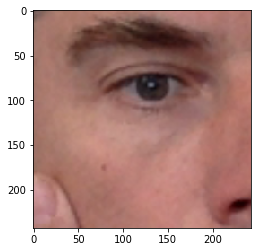

Prediction = right
Elapsed time = 1198.008 ms
[[267 186 209 209]] 2
[[267 186 209 209]] 2


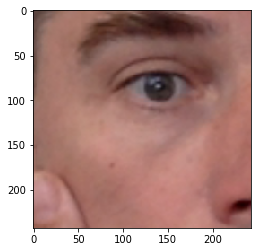

Prediction = center
Elapsed time = 378.432 ms
[[272 186 206 206]] 2
[[272 186 206 206]] 2


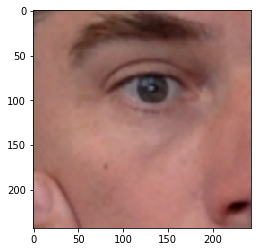

Prediction = right
Elapsed time = 424.370 ms
[[275 188 202 202]] 2
[[275 188 202 202]] 2


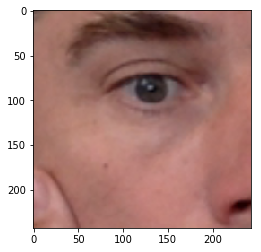

Prediction = right
Elapsed time = 727.162 ms
Capture released


In [16]:
from LeCheapEyeTracker.EyeTrackerServer import Server
#from LeCheapEyeTracker.EyeTrackerClient import Client

def classify(image, t):
    image = Image.fromarray(image.astype('uint8'), 'RGB')
    data = t(image)
    data.unsqueeze_(0)
    output = ml.model(data)#.double())
    #output = ml.model.forward(image)
    pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
    return pred



def dyn_test(N_frame=64, startup_time=1., interframe_time=0., waiting_time=.0, display=False):
    try:
        import time
        time.sleep(startup_time)
        et = Server()
        print ('Time', et.clock())
        img0 = et.cam.grab()
        img_face, res, t0 = et.process_frame(img0, et.clock())
        H, W, three = img_face.shape
        
        for i in range(N_frame):            
            # presentation of stimulus
            time.sleep(interframe_time)

            t0 = time.time()
            try:
                frame = et.cam.grab()
                img_face, res, t0_ = et.process_frame(frame, et.clock())
                img_face = img_face[:, :, ::-1]

                pred = classify(img_face, t)
                if display:
                    plt.imshow(img_face)
                    plt.show() 
                print('Prediction =', ml.dataset.dataset.classes[pred])
                print('Elapsed time =', '%0.3f' % ((time.time()-t0)*1000), 'ms')
            except:
                pass
            time.sleep(waiting_time)
            
    finally:
        et.close()
        
dyn_test(display=True)        